In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [29]:
df=pd.read_csv("../Data/diabetes.csv")

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

### Voting Classifier 
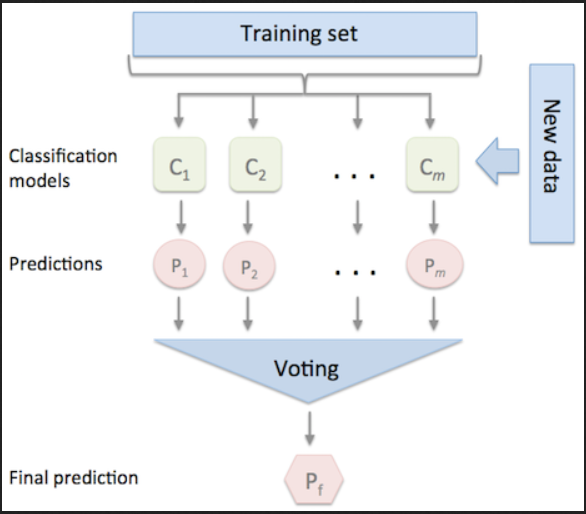

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
models=[
    ("lr",LogisticRegression()),
    ("knn",KNeighborsClassifier(n_neighbors=5)),
    ("GNB",GaussianNB()),
    ("RF",RandomForestClassifier(n_estimators=50)),
    ('ABC',AdaBoostClassifier(n_estimators=50)),
    ('GBC',GradientBoostingClassifier(n_estimators=50)),
    ('SVM',SVC(C=0.1,probability=True))
]

In [34]:
# voting Classifier

from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators =models,voting="soft")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.8051948051948052
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



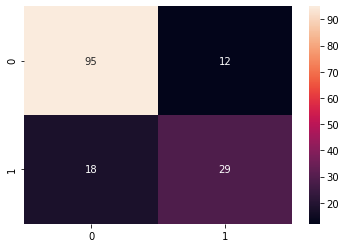

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [36]:
help(VotingClassifier)

Help on class VotingClassifier in module sklearn.ensemble._voting:

class VotingClassifier(sklearn.base.ClassifierMixin, _BaseVoting)
 |  VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
 |  
 |  Soft Voting/Majority Rule classifier for unfitted estimators.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Read more in the :ref:`User Guide <voting_classifier>`.
 |  
 |  Parameters
 |  ----------
 |  estimators : list of (str, estimator) tuples
 |      Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
 |      of those original estimators that will be stored in the class attribute
 |      ``self.estimators_``. An estimator can be set to ``'drop'``
 |      using ``set_params``.
 |  
 |      .. versionchanged:: 0.21
 |          ``'drop'`` is accepted.
 |  
 |      .. deprecated:: 0.22
 |         Using ``None`` to drop an estimator is deprecated in 0.22 and
 |         support will be dropped in 0.24. Use the string